In [11]:
from scipy.optimize import curve_fit
from functools import wraps

from coffea.util import load


# xsec_TT = 
class ComputeLimit:
    def __init__(self):
        self.output = load("output.coffea")

    def compute_prefactor(self, width, coupling):
        return width/(coupling**2)

    def fit_decorator(func):
        @wraps(func)
        def wrapper(self, x, y):
            return curve_fit(func, x, y)
        return wrapper

    @fit_decorator
    def fit_prefactor(self, x, a):
        return a * x ** 2

    def compute_fiducial_acceptance(self)

In [ ]:
# metadata: massT, xsec_process, width of all branches of T decay 

In [12]:
c = ComputeLimit()
x = [1, 2, 3, 4, 5]
y = [1, 4, 9, 16, 25]
c.fit_prefactor(x, y)

(array([2.10561345, 2.48104606]),
 array([[ 7.08597120e+30, -1.67318766e+31],
        [-1.67318766e+31,  3.95084437e+31]]))

Fitted parameters:
a = 1.161 ± 0.069
b = 265.277 ± 81206377305960.953
c = 1.970 ± 0.125
d = -3.104 ± 0.453
e = -795.720 ± 243619132104684.750
f = 532.458 ± 162412754985422.875


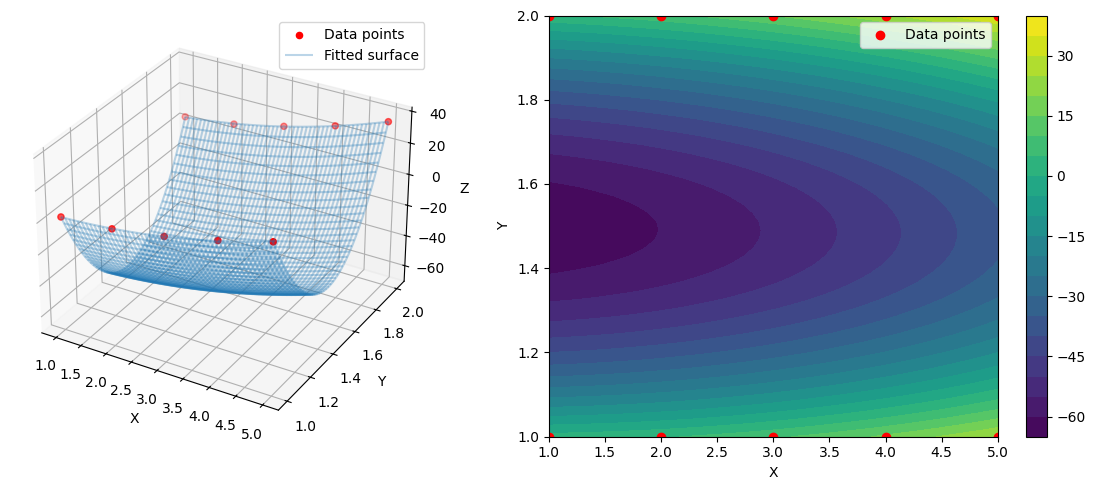

In [13]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Sample 2D data (replace with your data)
x = np.array([1, 2, 3, 4, 5, 1, 2, 3, 4, 5])
y = np.array([1, 1, 1, 1, 1, 2, 2, 2, 2, 2])
z = np.array([2.1, 4.2, 9.1, 16.3, 25.2, 4.3, 8.1, 15.2, 24.1, 35.3])

# Define 2D function to fit (example: paraboloid)
def paraboloid(X, a, b, c, d, e, f):
    x, y = X  # Unpack the input
    return a*x**2 + b*y**2 + c*x*y + d*x + e*y + f

# Prepare data for curve_fit
XY = np.vstack((x, y))  # Combine x and y into single array

# Perform the fit
popt, pcov = curve_fit(paraboloid, XY, z)
params = popt
errors = np.sqrt(np.diag(pcov))

print("Fitted parameters:")
param_names = ['a', 'b', 'c', 'd', 'e', 'f']
for name, param, error in zip(param_names, params, errors):
    print(f"{name} = {param:.3f} ± {error:.3f}")

# Generate fitted surface
x_fit = np.linspace(min(x), max(x), 50)
y_fit = np.linspace(min(y), max(y), 50)
X_fit, Y_fit = np.meshgrid(x_fit, y_fit)
Z_fit = paraboloid((X_fit, Y_fit), *params)

# Plot
fig = plt.figure(figsize=(12, 5))

# 3D plot
ax1 = fig.add_subplot(121, projection='3d')
ax1.scatter(x, y, z, color='red', label='Data points')
ax1.plot_wireframe(X_fit, Y_fit, Z_fit, alpha=0.3, label='Fitted surface')
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')
ax1.legend()

# Contour plot
ax2 = fig.add_subplot(122)
contour = ax2.contourf(X_fit, Y_fit, Z_fit, 20, cmap='viridis')
ax2.scatter(x, y, color='red', label='Data points')
plt.colorbar(contour, ax=ax2)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.legend()

plt.tight_layout()
plt.show()

In [16]:
s = set(["a", "b", "c"])
s.add("d")

In [17]:
s

{'a', 'b', 'c', 'd'}